<a href="https://colab.research.google.com/github/ss-Contreras/dropout-knn-svm/blob/main/SVM_y_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_excel("DF_final_numerico.xlsx")
df.head()

,ID_s,ID2,carrera,promedio_acad,edad,sisben,transporte,semestre,o_voca,e_carrera,...,p_profesores,per_profesores,motivacion,acoso_psc,c_acad,v_semestre,habilidades_pa,adaptacion_u,campus,recomendación_u
0,2,1,0,3.7,28,25,3,4,5,17,...,8,10,10,10,4,8,9,9,9,9
1,2,2,1,3.7,20,27,5,8,5,17,...,6,10,4,10,5,10,10,7,10,10
2,2,3,0,3.7,20,27,4,2,5,17,...,8,8,10,2,2,8,8,8,8,9
3,2,4,0,3.7,20,0,0,5,5,17,...,5,10,10,10,10,5,7,10,10,6
4,2,5,0,3.7,18,2,0,2,5,17,...,5,5,6,8,4,8,6,7,8,6


In [ ]:
df.columns

Index(['ID_s', 'ID2', 'carrera', 'promedio_acad', 'edad', 'sisben',
       'transporte', 'semestre', 'o_voca', 'e_carrera', 'i_carrera',
       'autopercepcion', 'aban_inter', 'razon', 'c_universidad', 'e_negativas',
       'g_afectacion', 'r_carrera', 't_estudios', 'ingresos', 'm_residencia',
       'p_cargo', 'financiacion', 't_hijos', 'embarazo_des', 'dificultades_t',
       'a_familiar', 'c_familiar', 'e_acad', 'd_acad', 'h_semanal',
       'a_profesores', 'c_profesores', 'm_calificacion', 'p_profesores',
       'per_profesores', 'motivacion', 'acoso_psc', 'c_acad', 'v_semestre',
       'habilidades_pa', 'adaptacion_u', 'campus', 'recomendación_u'],
      dtype='object')

In [ ]:
df.count()

,0
ID_s,483
ID2,483
carrera,483
promedio_acad,483
edad,483
sisben,483
transporte,483
semestre,483
o_voca,483
e_carrera,483


In [ ]:
X = df.drop(['motivacion'], axis = 1)
y = df[['motivacion']]

In [ ]:
X.head()

,ID_s,ID2,carrera,promedio_acad,edad,sisben,transporte,semestre,o_voca,e_carrera,...,m_calificacion,p_profesores,per_profesores,acoso_psc,c_acad,v_semestre,habilidades_pa,adaptacion_u,campus,recomendación_u
0,2,1,0,3.7,28,25,3,4,5,17,...,7,8,10,10,4,8,9,9,9,9
1,2,2,1,3.7,20,27,5,8,5,17,...,6,6,10,10,5,10,10,7,10,10
2,2,3,0,3.7,20,27,4,2,5,17,...,8,8,8,2,2,8,8,8,8,9
3,2,4,0,3.7,20,0,0,5,5,17,...,6,5,10,10,10,5,7,10,10,6
4,2,5,0,3.7,18,2,0,2,5,17,...,6,5,5,8,4,8,6,7,8,6


In [ ]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
parametros = {
    'C': [0.01, 0.1, 1],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

In [ ]:
modelo_svm = svm.SVC()

In [ ]:
grid = GridSearchCV(modelo_svm, parametros, refit=True, verbose = 2, cv = 5)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=  12.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   6.4s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   7.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   6.8s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.3s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   8.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   6.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   6.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.9s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   2.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   6.9s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   8.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   7.9s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ........................C=1, gamma=1, kernel=linear; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   9.6s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.3s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  12.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   7.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   8.4s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   7.6s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  12.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   9.4s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   7.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
grid.best_params_

{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
results = pd.DataFrame(grid.cv_results_)

# Muestras los puntajes de cada modelo
print(results[['params', 'mean_test_score', 'std_test_score']])

                                             params  mean_test_score  \
0       {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}         0.383550   
1          {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}         0.386014   
2         {'C': 0.01, 'gamma': 1, 'kernel': 'poly'}         0.256577   
3      {'C': 0.01, 'gamma': 1, 'kernel': 'sigmoid'}         0.386014   
4     {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}         0.383550   
5        {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}         0.386014   
6       {'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}         0.253979   
7    {'C': 0.01, 'gamma': 0.1, 'kernel': 'sigmoid'}         0.386014   
8    {'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}         0.383550   
9       {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}         0.386014   
10     {'C': 0.01, 'gamma': 0.01, 'kernel': 'poly'}         0.259174   
11  {'C': 0.01, 'gamma': 0.01, 'kernel': 'sigmoid'}         0.386014   
12       {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}         0.31

In [ ]:
print(results.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [ ]:
criterios_unicos = results['param_C'].unique()

valores_criterio = {}

for criterio in criterios_unicos:
    df_filtrado = results[results['param_C'] == criterio]

    # Valores máximos de los splits
    valores_maximos = df_filtrado[['mean_test_score']].max()
    valores_criterio[criterio] = valores_maximos

print(valores_criterio)

{0.01: mean_test_score    0.386014
dtype: float64, 0.1: mean_test_score    0.386014
dtype: float64, 1.0: mean_test_score    0.386014
dtype: float64}


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definición de parámetros para GridSearchCV
parametros = {
    'C': [0.01, 0.1, 1],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# Inicialización del modelo SVM
modelo_svm = svm.SVC()

# Configuración de GridSearchCV
grid = GridSearchCV(modelo_svm, parametros, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

# Obtener el mejor modelo
mejor_modelo = grid.best_estimator_

# Predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Cálculo de métricas de desempeño
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Mostrar las métricas
print("Métricas de Desempeño del Modelo SVM:")
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Puntuación F1: {f1:.4f}")
print(f"Exactitud (Accuracy): {accuracy:.4f}\n")

# Opcional: Informe de clasificación detallado
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

# Opcional: Matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=1, kernel=linear; total time=   0.3s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=0.01, gamma=1, kernel=poly; total time=   7.4s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=0.01, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.2s
[CV] END ...................C=0.01, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   6.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   6.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.1, kernel=poly; total time=   5.9s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.01, gamma=0.01, kernel=poly; total time=   7.5s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.01, gamma=0.01, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   7.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   1.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   7.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   7.4s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   1.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   4.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   7.6s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ........................C=1, gamma=1, kernel=linear; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   5.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=1, kernel=linear; total time=   9.2s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   6.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   5.9s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   8.2s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   7.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   7.3s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=  12.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   6.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   9.3s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] END .......................C=1, gamma=0.01, kernel=poly; total time=   6.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.01, kernel=sigmoid; total time=   0.0s
Métricas de Desempeño del Modelo SVM:
Precisión: 0.1455
Recall: 0.3814
Puntuación F1: 0.2106
Exactitud (Accuracy): 0.3814

Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

# **KNN**

-------------------------------------------------------------------------

In [ ]:
# parametros = {'n_neighbors': [int(y) for y in range(1,200)],
#               'weights': ['uniform','distance'],
#               'algorithm': ['auto', 'ball_tree','kd_tree','brute']}

parametros = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}

In [ ]:
modelo_k = KNeighborsClassifier()

In [ ]:
grid_k = GridSearchCV(modelo_k, parametros, refit=True, verbose = 2, cv = 5)

In [ ]:
grid_k.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=1, weights=distance; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.

[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=au

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=distance; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=distance; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=1, weights=distance; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=20, p=2, weights=distance; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=auto, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=1,

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=9, p=2,

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neigh

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighb

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=distance; total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neigh

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighb

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=ball_tree, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=ball_tree, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=1, weights=distance

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=3, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=1, weights=uniform; total 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=5, p=2, weights=distance; tota

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=uniform; total 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=7, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=1, weights=distance; tota

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=9, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=1, weights=uniform; t

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=11, p=2, weights=di

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=2, weights=uni

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=15, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=1, weights=di

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=20, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=1, weights=uni

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

[CV] END algorithm=kd_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=2, weights=uniform; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=2, weights=distance; total time=   0.0s
[CV] END algorithm=kd_tree, n_neighbors=25, p=2, weights=di

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15, 20, 25],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             verbose=2)

In [ ]:
# Hacemos predicciones con los datos de prueba
predicciones = grid.predict(X_test)

# Evaluamos el modelo
print("Exactitud:", metrics.accuracy_score(y_test, predicciones))

Exactitud: 0.38144329896907214


In [ ]:
grid_k.best_params_

{'algorithm': 'auto', 'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

In [ ]:
grid_k.best_score_

0.3781884781884782

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predicciones y evaluación del modelo
predicciones = grid.predict(X_test)

# Generar reporte de clasificación
reporte = metrics.classification_report(y_test, predicciones, digits=2)
print(reporte)


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        13
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        12
          10       0.38      1.00      0.55        37

    accuracy                           0.38        97
   macro avg       0.04      0.11      0.06        97
weighted avg       0.15      0.38      0.21        97



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


NUEVO TEST


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Cargar el archivo Excel
df = pd.read_excel("DF_final_numerico.xlsx")
# Función para calcular el coeficiente de Cramer
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Identificar variables categóricas
categorical_columns = df.select_dtypes(include=['int', 'object']).columns
categorical_columns = categorical_columns.difference(['ID_s', 'ID2', 'motivacion'])

# Calcular el coeficiente de Cramer para cada variable categórica con respecto a 'motivacion'
cramers_results = {}

for col in categorical_columns:
    confusion_matrix = pd.crosstab(df[col], df['motivacion'])

    # Verificar si la tabla de contingencia es válida
    if not confusion_matrix.empty and confusion_matrix.shape[0] > 1 and confusion_matrix.shape[1] > 1:
        cramers_results[col] = cramers_v(confusion_matrix)

# Ordenar los resultados por el valor del coeficiente de Cramer
cramers_results_sorted = dict(sorted(cramers_results.items(), key=lambda item: item[1], reverse=True))

# Mostrar los resultados
for variable, cramer_value in cramers_results_sorted.items():
    print(f"Variable: {variable}, Coeficiente de Cramer: {cramer_value:.3f}")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# **Gráficas del conjunto de Datos**


Variable: r_carrera, Cramer's Coefficient: 0.342
Variable: campus, Cramer's Coefficient: 0.308
Variable: razon, Cramer's Coefficient: 0.300
Variable: m_residencia, Cramer's Coefficient: 0.290
Variable: p_profesores, Cramer's Coefficient: 0.284
Variable: habilidades_pa, Cramer's Coefficient: 0.276
Variable: sisben, Cramer's Coefficient: 0.269
Variable: per_profesores, Cramer's Coefficient: 0.258
Variable: recomendación_u, Cramer's Coefficient: 0.251
Variable: d_acad, Cramer's Coefficient: 0.227
Variable: adaptacion_u, Cramer's Coefficient: 0.226
Variable: acoso_psc, Cramer's Coefficient: 0.219
Variable: edad, Cramer's Coefficient: 0.219
Variable: c_acad, Cramer's Coefficient: 0.211
Variable: t_hijos, Cramer's Coefficient: 0.210
Variable: autopercepcion, Cramer's Coefficient: 0.207
Variable: financiacion, Cramer's Coefficient: 0.204
Variable: v_semestre, Cramer's Coefficient: 0.201
Variable: c_familiar, Cramer's Coefficient: 0.197
Variable: dificultades_t, Cramer's Coefficient: 0.197
Var

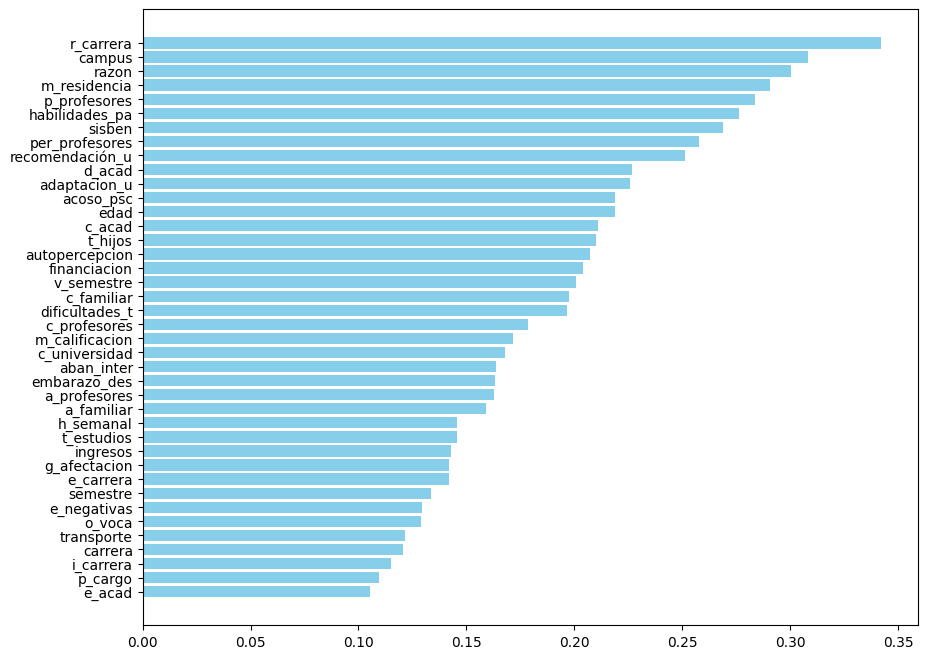

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


categorical_columns = df.select_dtypes(include=['int', 'object']).columns
categorical_columns = categorical_columns.difference(['ID_s', 'ID2', 'motivacion'])

cramers_results = {}

def cramers_v(dataset):
    X2 = stats.chi2_contingency(dataset, correction=False)[0]
    N = np.sum(dataset)
    minimum_dimension = min(dataset.shape) - 1
    return np.sqrt((X2 / N) / minimum_dimension)

for col in categorical_columns:
    confusion_matrix = pd.crosstab(df[col], df['motivacion'])

    if confusion_matrix.shape[0] > 1 and confusion_matrix.shape[1] > 1:
        cramer_value = cramers_v(confusion_matrix.values)
        if np.isfinite(cramer_value):
            cramers_results[col] = cramer_value

cramers_results_sorted = dict(sorted(cramers_results.items(), key=lambda item: item[1], reverse=True))

for variable, cramer_value in cramers_results_sorted.items():
    print(f"Variable: {variable}, Cramer's Coefficient: {cramer_value:.3f}")

plt.figure(figsize=(10, 8))
plt.barh(list(cramers_results_sorted.keys()), list(cramers_results_sorted.values()), color='skyblue')
plt.gca().invert_yaxis()
plt.show()


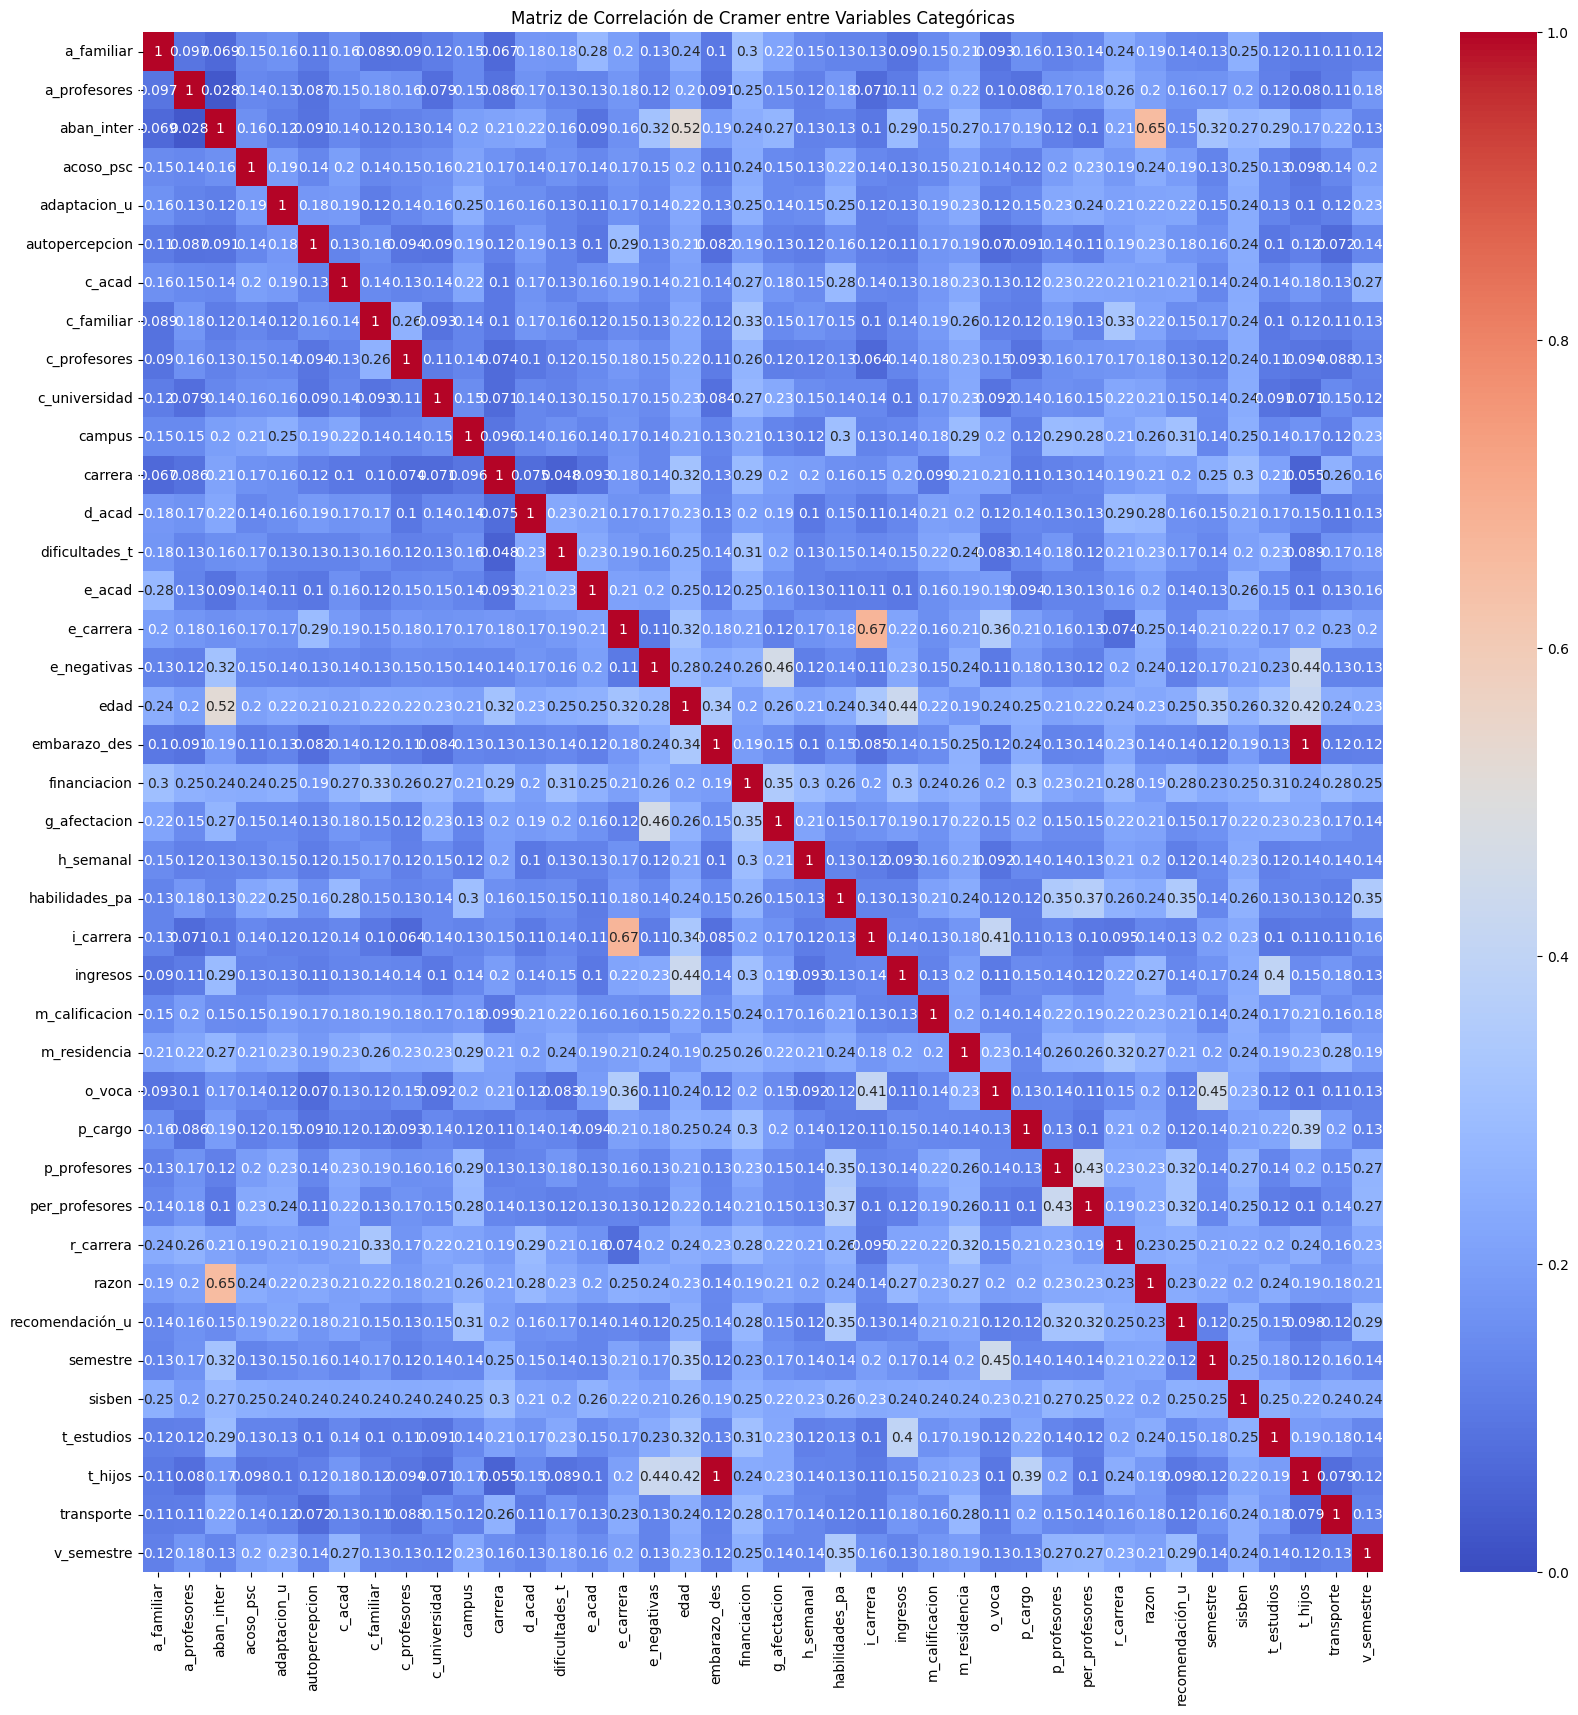

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


categorical_columns = df.select_dtypes(include=['int', 'object']).columns
categorical_columns = categorical_columns.difference(['ID_s', 'ID2', 'motivacion'])

def cramers_v(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix, correction=False)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

cramers_v_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                                index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            confusion_matrix = pd.crosstab(df[col1], df[col2])
            if confusion_matrix.shape[0] > 1 and confusion_matrix.shape[1] > 1:
                cramers_v_matrix.loc[col1, col2] = cramers_v(confusion_matrix.values)
            else:
                cramers_v_matrix.loc[col1, col2] = np.nan
        else:
            cramers_v_matrix.loc[col1, col2] = 1.0

plt.figure(figsize=(20, 20))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Matriz de Correlación de Cramer entre Variables Categóricas')
plt.show()


# Pruebas, mejoras al Modelo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_excel("DF_final_numerico.xlsx")

In [ ]:
X = df.drop(['motivacion'], axis = 1)
y = df[['motivacion']]

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=1)  # Ajuste a 2 o el número mínimo de muestras en la clase minoritaria menos uno
X_res, y_res = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('knn', KNeighborsClassifier())
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10)),
    ('svm', SVC())
])

In [ ]:
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto']
}

In [ ]:
# 6. Realizar la búsqueda de hiperparámetros
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')

grid_knn.fit(X_train, y_train)
grid_svm.fit(X_train, y_train)

# 7. Obtener los mejores estimadores
best_knn = grid_knn.best_estimator_
best_svm = grid_svm.best_estimator_

# 8. Evaluar el rendimiento en el conjunto de prueba
y_pred_knn = best_knn.predict(X_test)
y_pred_svm = best_svm.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        40
           4       1.00      1.00      1.00        27
           5       0.91      0.98      0.94        41
           6       0.85      0.92      0.89        38
           7       0.76      0.93      0.84        41
           8       0.74      0.81      0.77        36
           9       0.71      0.88      0.79        40
          10       0.87      0.31      0.46        42

    accuracy                           0.87       372
   macro avg       0.88      0.88      0.87       372
weighted avg       0.88      0.87      0.86       372

SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        32
           3       1.00 

In [ ]:
print(f"Accuracy KNN: {accuracy_score(y_test, y_pred_knn)}")
print(f"Accuracy SVM: {accuracy_score(y_test, y_pred_svm)}")

NameError: name 'accuracy_score' is not defined

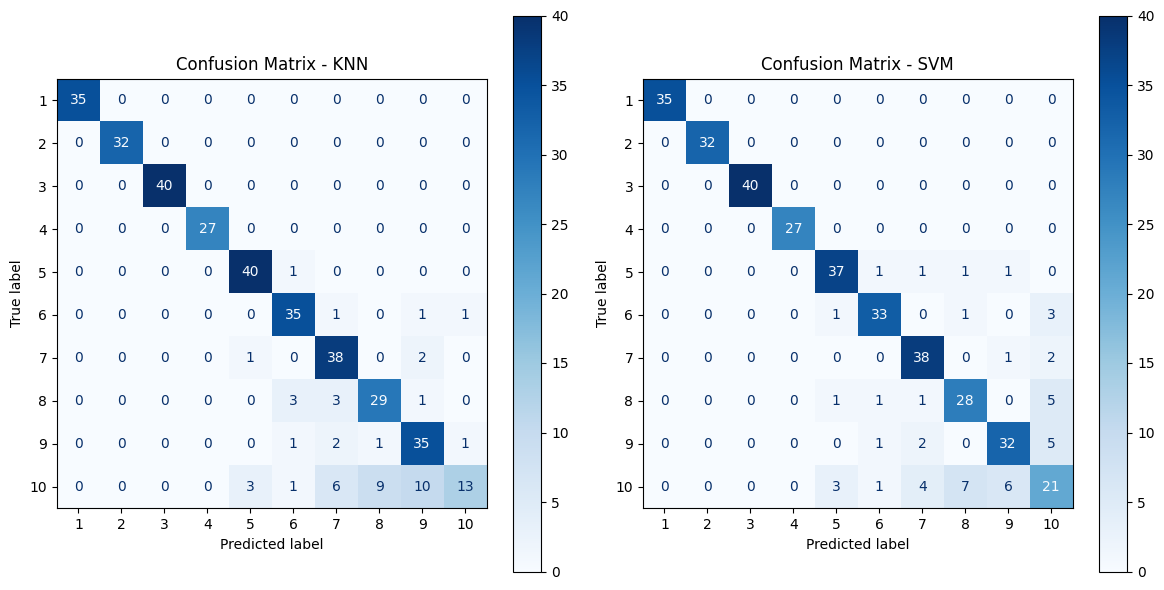

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de Confusión para KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(y))
disp_knn.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title('Confusion Matrix - KNN')

# Matriz de Confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(y))
disp_svm.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title('Confusion Matrix - SVM')

plt.tight_layout()
plt.show()


In [ ]:
y_pred_knn = best_knn.predict(X_test)
y_pred_svm = best_svm.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

KNN Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        32
           3       1.00      0.97      0.99        40
           4       0.84      1.00      0.92        27
           5       0.72      0.80      0.76        41
           6       0.74      0.84      0.79        38
           7       0.74      0.83      0.78        41
           8       0.72      0.64      0.68        36
           9       0.73      0.68      0.70        40
          10       0.60      0.43      0.50        42

    accuracy                           0.81       372
   macro avg       0.81      0.82      0.81       372
weighted avg       0.80      0.81      0.80       372

SVM Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        32
           3       1.00 

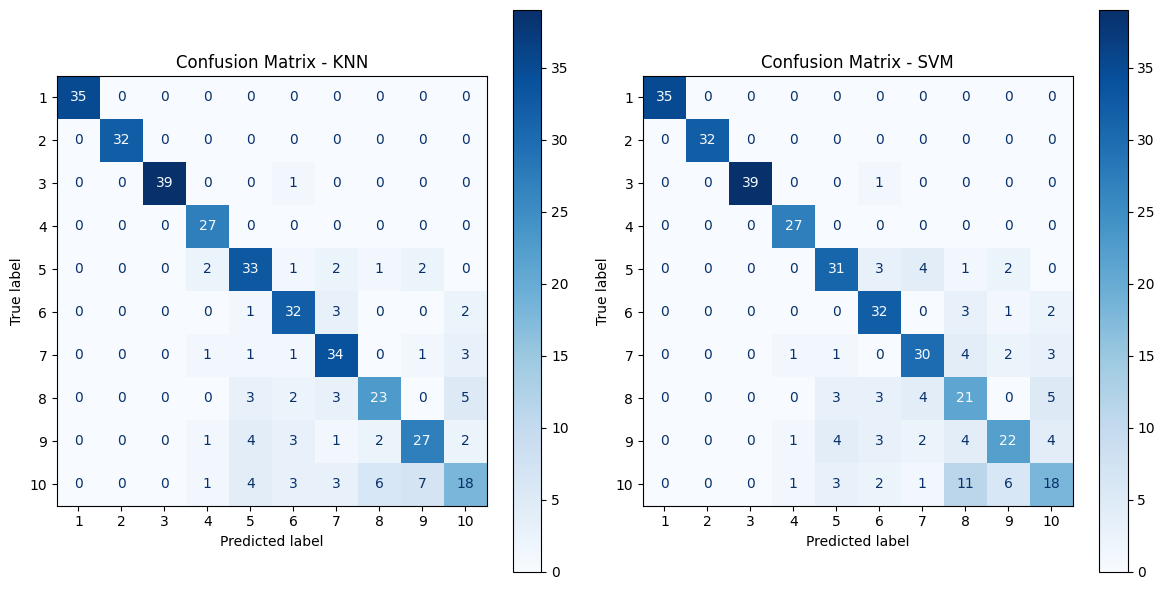

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de Confusión para KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(y))
disp_knn.plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title('Confusion Matrix - KNN')

# Matriz de Confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(y))
disp_svm.plot(ax=ax[1], cmap='Blues', values_format='d')
ax[1].set_title('Confusion Matrix - SVM')

plt.tight_layout()
plt.show()


In [ ]:
metrics_knn = classification_report(y_test, y_pred_knn, output_dict=True)
metrics_svm = classification_report(y_test, y_pred_svm, output_dict=True)

accuracy_knn = metrics_knn['accuracy']
accuracy_svm = metrics_svm['accuracy']

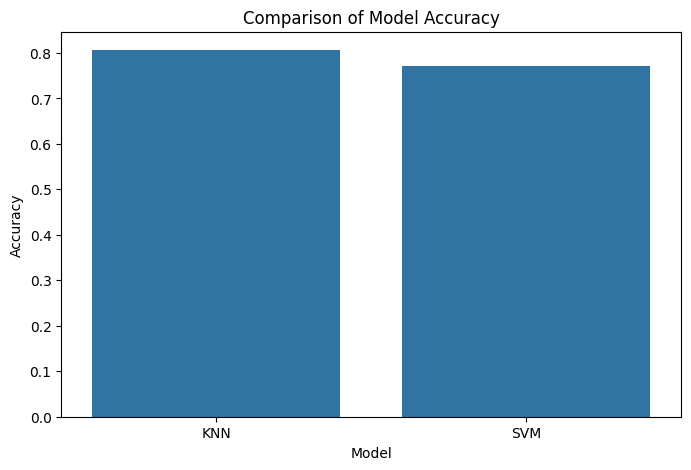

In [ ]:
df_metrics = pd.DataFrame({
    'Model': ['KNN', 'SVM'],
    'Accuracy': [accuracy_knn, accuracy_svm]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=df_metrics)
plt.title('Comparison of Model Accuracy')
plt.show()

In [ ]:
print(f"Accuracy KNN: {accuracy_score(y_test, y_pred_knn)}")
print(f"Accuracy SVM: {accuracy_score(y_test, y_pred_svm)}")

Accuracy KNN: 0.8709677419354839
Accuracy SVM: 0.8682795698924731


# Gráficas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df.columns

Index(['ID_s', 'ID2', 'carrera', 'promedio_acad', 'edad', 'sisben',
       'transporte', 'semestre', 'o_voca', 'e_carrera', 'i_carrera',
       'autopercepcion', 'aban_inter', 'razon', 'c_universidad', 'e_negativas',
       'g_afectacion', 'r_carrera', 't_estudios', 'ingresos', 'm_residencia',
       'p_cargo', 'financiacion', 't_hijos', 'embarazo_des', 'dificultades_t',
       'a_familiar', 'c_familiar', 'e_acad', 'd_acad', 'h_semanal',
       'a_profesores', 'c_profesores', 'm_calificacion', 'p_profesores',
       'per_profesores', 'motivacion', 'acoso_psc', 'c_acad', 'v_semestre',
       'habilidades_pa', 'adaptacion_u', 'campus', 'recomendación_u'],
      dtype='object')

Text(0.5, 1.0, 'Distribución de Carreras')

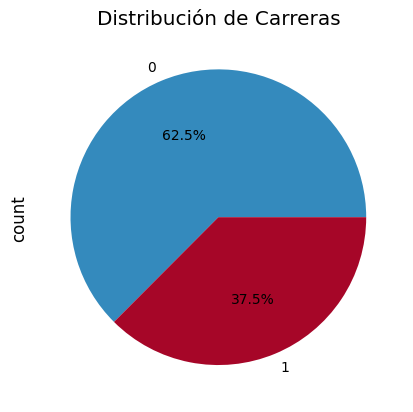

In [ ]:
serie = df.carrera.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct= '%1.1f%%')
plt.title('Distribución de Carreras')

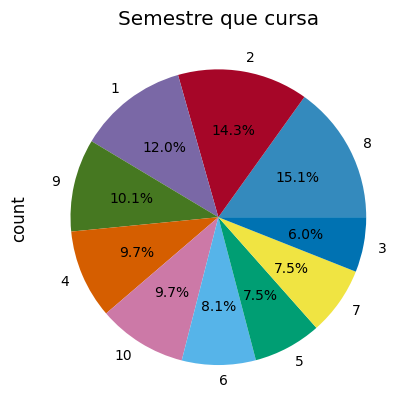

In [ ]:
import matplotlib.pyplot as plt

serie = df.semestre.value_counts()

serie = serie.sort_values(ascending=False)

plt.style.use('bmh')

serie.plot.pie(autopct='%1.1f%%')

plt.title('Semestre que cursa')

plt.show()

In [ ]:
import matplotlib.pyplot as plt

serie = df.o_voca.value_counts()

plt.style.use('bmh')

serie.plot.pie(autopct='%1.1f%%')

plt.title('Orientación Vocacional')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

serie = df.autopercepcion.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Autopercepción')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

serie = df.aban_inter.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Abandono de Interés')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

serie = df.c_universidad.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Calificación de la Universidad')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

serie = df.e_negativas.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Emociones Negativas')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

serie = df.g_afectacion.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Grado de Afectación')
plt.show()


In [ ]:
serie = df.t_estudios.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Tipo de Estudios')
plt.show()

In [ ]:
serie = df.ingresos.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Ingresos')
plt.show()

In [ ]:
serie = df.t_hijos.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Tiene Hijos')
plt.show()

In [ ]:
serie = df.embarazo_des.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Embarazo Deseado')
plt.show()


In [ ]:
serie = df.dificultades_t.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Dificultades en el Trabajo')
plt.show()

In [ ]:
serie = df.a_familiar.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Apoyo Familiar')
plt.show()

In [ ]:
serie = df.e_acad.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Emociones Académicas')
plt.show()

In [ ]:
serie = df.d_acad.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Dificultades Académicas')
plt.show()

In [ ]:
serie = df.h_semanal.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Horas Semanales de Estudio')
plt.show()

In [ ]:
serie = df.a_profesores.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Apreciación de los Profesores')
plt.show()

In [ ]:
serie = df.c_profesores.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Calificación de los Profesores')
plt.show()

In [ ]:
serie = df.m_calificacion.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Calificación Media')
plt.show()

In [ ]:
serie = df.acoso_psc.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Acoso Psicológico')
plt.show()

In [ ]:
serie = df.c_acad.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Calificación Académica')
plt.show()


In [ ]:
serie = df.v_semestre.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Valoración del Semestre')
plt.show()

In [ ]:
serie = df.habilidades_pa.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Habilidades de Prueba de Aptitud')
plt.show()


In [ ]:
serie = df.adaptacion_u.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Adaptación Universitaria')
plt.show()

In [ ]:
serie = df.recomendación_u.value_counts()
plt.style.use('bmh')
serie.plot.pie(autopct='%1.1f%%')
plt.title('Recomendación Universitaria')
plt.show()

In [ ]:
x = df.semestre.value_counts()

plt.figure(figsize=(10, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Estudiantes por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.ingresos.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.h_semanal.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Horas de estudio a la semana')
plt.xlabel('Horas de Estudio')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.m_calificacion.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Método de Calificación')
plt.xlabel('Método de Calificación')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.p_profesores.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Pedagogía de los Profesores')
plt.xlabel('Pedagogía de los Profesores')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.per_profesores.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Pefil académico de los Profesores')
plt.xlabel('Perfil académico de los Profesores')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.motivacion.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Motivación por culminar los estudios')
plt.xlabel('Motivación')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.c_acad.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Carga Académica')
plt.xlabel('Carga Académica')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.v_semestre.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Valor del Semestre')
plt.xlabel('Valor del semestre')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.habilidades_pa.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Habilidades Prácticas')
plt.xlabel('Habilidades Prácticas')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.adaptacion_u.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Adapatación a la Unoversidad')
plt.xlabel('Adapatación a la Unoversidad')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.campus.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Valoración del Campus')
plt.xlabel('Valoración del Campus')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

In [ ]:
x = df.recomendación_u.value_counts()

plt.figure(figsize=(16, 6))
x.plot(kind='bar', color='skyblue')
plt.title('Estudiantes vs Nivel de Recomendación de la Universidad')
plt.xlabel('Nivel de Recomendación de la Universidad')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

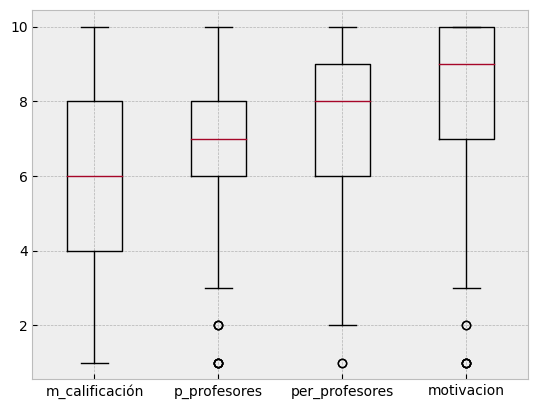

In [ ]:
plt.boxplot([df['m_calificacion'], df['p_profesores'], df['per_profesores'], df['motivacion']],
            labels=['m_calificación', 'p_profesores', 'per_profesores', 'motivacion'])
plt.show()

Coheficiente Gamma para pruebas de asociación y
Análisis de correspondencias multiples

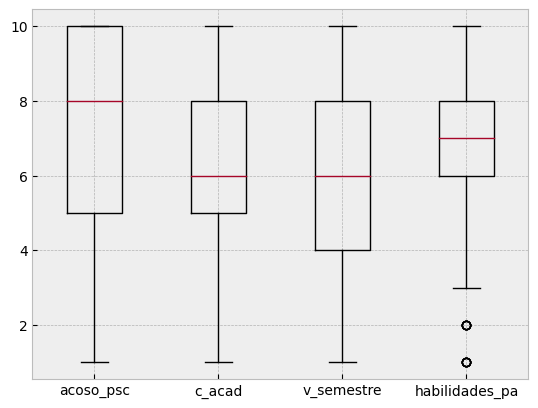

In [ ]:
plt.boxplot([df['acoso_psc'], df['c_acad'], df['v_semestre'], df['habilidades_pa']], labels=['acoso_psc','c_acad', 'v_semestre', 'habilidades_pa'])
plt.show()

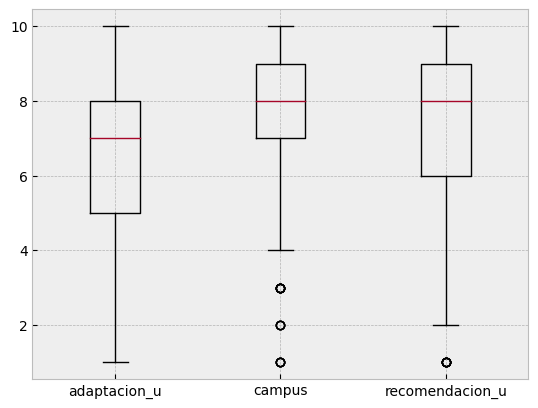

In [ ]:
plt.boxplot([df['adaptacion_u'], df['campus'], df['recomendación_u']], labels=['adaptacion_u','campus','recomendacion_u'])
plt.show()

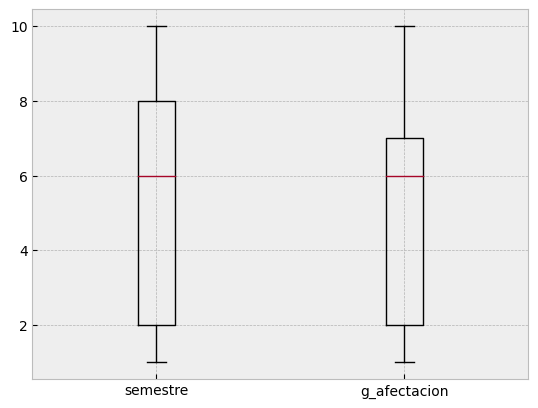

In [ ]:
plt.boxplot([df['semestre'], df['g_afectacion']], labels=['semestre', 'g_afectacion'])
plt.show()

<Axes: >

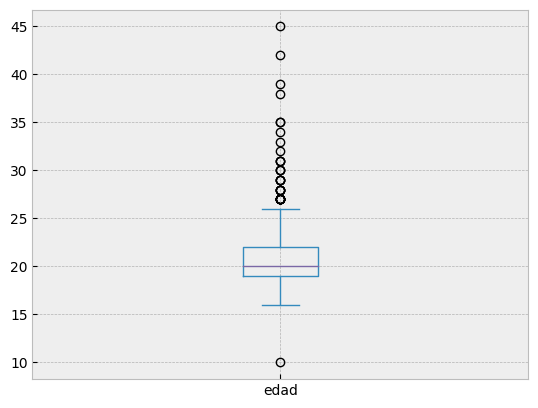

In [ ]:
df.edad.plot.box()